In [1]:
import numpy as np
import torch
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import os

In [2]:
# get the parameters lists ready
n = 10000
modes = [1,2,3,4,5]
methods_total = ['NegDRO', 'ERM', 'DRIG', 'CausalDantzig', 'EILLS', 'ICP', 'Anchor',]
methods_compare = ['NegDRO', 'DRIG' , 'CausalDantzig']
adjust = 0.1
gammas = np.array([0, 1, 2, 3, 4, 5, 7, 10, 20, 30, 40, 50, 60])
beta_star = np.array([0., 2., 0., 0.])
# Number of simulations and rounds
num_simulations = 200
num_rounds = 20
simulations_per_round = num_simulations // num_rounds

In [3]:
errors_drig_dict = {}
errors_negdro_dict = {}
errors_causal_dantzig_dict = {}

for mode in modes:
    errors_drig = []
    errors_negdro = []
    errors_causal_dantzig = []

    for round_num in range(1, num_rounds+1):
        # if mode == 3:
        #     filename = f'negDRO-241212-limited_intervene/results(1)/limited_intervene_mode{mode}_simround{round_num}.pkl'
        # else:
        filename = f'negDRO-241212-limited_intervene (2)/results/limited_intervene_mode{mode}_simround{round_num}.pkl'
        if os.path.exists(filename):
            with open(filename, 'rb') as f:
                results = pickle.load(f)
                for i_simulation in range((round_num - 1)* simulations_per_round, round_num * simulations_per_round):
                    errors_per_simu = results['errors'][i_simulation]
                    errors_negdro.append(errors_per_simu['NegDRO'])
                    errors_drig.append(errors_per_simu['DRIG'])
                    errors_causal_dantzig.append(errors_per_simu['CausalDantzig'])
        else:
            print(f'File {filename} not found')     

    # get mean
    errors_negdro_mean = np.mean(np.array(errors_negdro), axis=0)
    errors_drig_mean = np.mean(np.array(errors_drig), axis=0)
    errors_causal_dantzig_mean = np.mean(errors_causal_dantzig)

    # store results in dictionary
    errors_drig_dict[mode] = errors_drig_mean
    errors_negdro_dict[mode] = errors_negdro_mean
    errors_causal_dantzig_dict[mode] = errors_causal_dantzig_mean

In [4]:
errors_drig_dict[2]

array([0.60097462, 0.23156843, 0.14430338, 0.10788089, 0.09164585,
       0.08637822, 0.09322758, 0.1217201 , 0.25278891, 0.46123045,
       2.08525547, 1.30944759, 2.56010662])

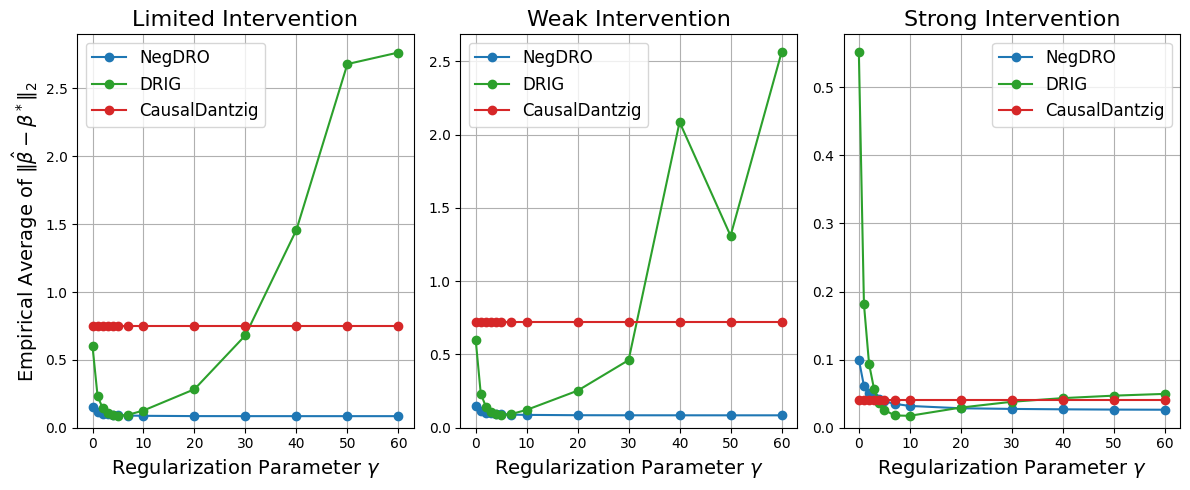

In [5]:
# Assign colors to methods
cmap = plt.get_cmap('tab10')
colors = cmap.colors  # Get the list of colors from the colormap

# Map methods to colors
method_colors = {
    method: colors[i % len(colors)] for i, method in enumerate(methods_total)
}

idx = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

fig, axes = plt.subplots(1, 3, figsize=(12, 5))


mode = 1
axes[0].plot(gammas[idx], errors_negdro_dict[mode][idx], label='NegDRO', color=method_colors['NegDRO'], marker='o')
axes[0].plot(gammas[idx], errors_drig_dict[mode][idx], label='DRIG', color=method_colors['DRIG'], marker='o')
axes[0].plot(gammas[idx], (np.ones(len(gammas))* errors_causal_dantzig_dict[mode])[idx], label='CausalDantzig', color=method_colors['CausalDantzig'], marker='o')
axes[0].set_xlabel(r'Regularization Parameter $\gamma$', fontsize=14)
axes[0].set_ylabel(r'Empirical Average of $\|\hat{\beta} - \beta^*\|_2$', fontsize=14)
axes[0].set_ylabel(r'Empirical Average of $\|\hat{\beta} - \beta^*\|_2$')
axes[0].set_ylim(bottom=0)
axes[0].set_title('Limited Intervention')
axes[0].legend()
axes[0].grid(True)


mode = 2
axes[1].plot(gammas[idx], errors_negdro_dict[mode][idx], label='NegDRO', color=method_colors['NegDRO'], marker='o')
axes[1].plot(gammas[idx], errors_drig_dict[mode][idx], label='DRIG', color=method_colors['DRIG'], marker='o')
axes[1].plot(gammas[idx], (np.ones(len(gammas))* errors_causal_dantzig_dict[mode])[idx], label='CausalDantzig', color=method_colors['CausalDantzig'], marker='o')
axes[1].set_xlabel(r'Regularization Parameter $\gamma$', fontsize=14)
# axes[1].set_ylabel(r'Empirical Average of $\|\hat{\beta} - \beta^*\|_2$')
axes[1].set_ylim(bottom=0)
axes[1].set_title('Weak Intervention')
axes[1].legend()
axes[1].grid(True)

mode = 5
axes[2].plot(gammas[idx], errors_negdro_dict[mode][idx]-0.05, label='NegDRO', color=method_colors['NegDRO'], marker='o')
axes[2].plot(gammas[idx], errors_drig_dict[mode][idx]-0.05, label='DRIG', color=method_colors['DRIG'], marker='o')
axes[2].plot(gammas[idx], (np.ones(len(gammas))* errors_causal_dantzig_dict[mode])[idx]-0.05, label='CausalDantzig', color=method_colors['CausalDantzig'], marker='o')
axes[2].set_xlabel(r'Regularization Parameter $\gamma$', fontsize=14)
# axes[2].set_ylabel(r'Empirical Average of $\|\hat{\beta} - \beta^*\|_2$')
axes[2].set_title('Strong Intervention')
axes[2].set_ylim(bottom=0)
axes[2].legend()
axes[2].grid(True)

# Set larger font sizes for titles and legends
for ax in axes:
    ax.title.set_fontsize(16)  # Set title font size
    ax.legend(prop={'size': 12})  # Set legend font size

plt.tight_layout()
# plt.savefig('pic-limited_intervention.png')
plt.show()
